# 📊 Session 6: Text Classification

**Learning Objectives:**
- Understand different text classification algorithms (MultinomialNB, SVM, Logistic Regression)
- Implement train/test split and cross-validation
- Evaluate models using confusion matrix, F1-score, and other metrics
- Practice multi-class text classification
- Compare model performance and select the best approach

**Dataset:** We'll work with news articles, product reviews, and custom datasets

---

## 🛠️ Setup and Imports

In [4]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

# Text processing
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import LabelEncoder

# Classification models
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation metrics
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_auc_score,
    roc_curve, precision_recall_curve
)

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Download required NLTK data
import ssl
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

nltk.download('punkt', quiet=True)
nltk.download('punkt_tab', quiet=True)
nltk.download('stopwords', quiet=True)
nltk.download('wordnet', quiet=True)
nltk.download('omw-1.4', quiet=True)

# Set style for plots
plt.style.use('default')
sns.set_palette("husl")

print("✅ All libraries imported successfully!")
print(f"🐍 NumPy version: {np.__version__}")
print(f"🐼 Pandas version: {pd.__version__}")

✅ All libraries imported successfully!
🐍 NumPy version: 2.0.2
🐼 Pandas version: 2.2.2


## 📊 Data Preparation

In [5]:
# Create sample datasets for text classification

def create_news_dataset():
    """Create a sample news classification dataset"""

    # Technology news
    tech_news = [
        "New AI breakthrough enables faster machine learning algorithms",
        "Tech giant releases latest smartphone with advanced camera features",
        "Cybersecurity experts warn about new malware threats",
        "Cloud computing adoption accelerates across enterprises",
        "Quantum computing research shows promising results",
        "Software update fixes critical security vulnerabilities",
        "Virtual reality technology transforms gaming industry",
        "Internet of Things devices increase smart home adoption",
        "Blockchain technology revolutionizes financial transactions",
        "Artificial intelligence improves medical diagnosis accuracy"
    ]

    # Sports news
    sports_news = [
        "Championship game ends with dramatic overtime victory",
        "Star athlete breaks long-standing world record",
        "Team trades popular player to rival franchise",
        "Olympic preparations continue despite venue challenges",
        "Coach announces retirement after successful career",
        "Rookie player shows exceptional talent in debut season",
        "Stadium renovations completed before season opener",
        "League implements new rules to improve player safety",
        "International tournament draws record viewership",
        "Injury forces veteran player to miss championship"
    ]

    # Business news
    business_news = [
        "Stock market reaches all-time high amid economic optimism",
        "Major corporation announces significant layoffs",
        "Startup secures massive funding round from investors",
        "Merger creates industry-leading company",
        "Economic indicators suggest potential recession",
        "Company reports record quarterly profits",
        "Trade negotiations impact global supply chains",
        "Central bank adjusts interest rates",
        "Retail sales decline during holiday season",
        "Cryptocurrency market experiences volatile trading"
    ]

    # Health news
    health_news = [
        "New vaccine shows high effectiveness in clinical trials",
        "Medical breakthrough offers hope for cancer patients",
        "Health officials recommend updated safety guidelines",
        "Research reveals benefits of Mediterranean diet",
        "Mental health awareness campaign launches nationwide",
        "Gene therapy treatment approved for rare disease",
        "Exercise study shows surprising cardiovascular benefits",
        "Pharmaceutical company recalls contaminated medication",
        "Telemedicine adoption grows in rural communities",
        "Sleep disorder research identifies new treatment options"
    ]

    # Combine all categories
    texts = tech_news + sports_news + business_news + health_news
    labels = (['Technology'] * len(tech_news) +
             ['Sports'] * len(sports_news) +
             ['Business'] * len(business_news) +
             ['Health'] * len(health_news))

    return pd.DataFrame({'text': texts, 'category': labels})

def create_sentiment_dataset():
    """Create a sample sentiment classification dataset"""

    positive_reviews = [
        "This product is absolutely amazing! Highly recommend it.",
        "Outstanding quality and excellent customer service.",
        "Best purchase I've made this year. Love it!",
        "Incredible value for money. Very satisfied.",
        "Perfect product, fast shipping, great experience.",
        "Exceeded my expectations in every way possible.",
        "Fantastic build quality and beautiful design.",
        "Works perfectly and arrived ahead of schedule.",
        "Brilliant product with innovative features.",
        "Absolutely delighted with this purchase."
    ]

    negative_reviews = [
        "Terrible product, completely waste of money.",
        "Poor quality and horrible customer support.",
        "Worst purchase ever. Do not recommend.",
        "Overpriced and underdelivered. Very disappointed.",
        "Product broke after one week. Awful quality.",
        "Completely useless and poorly designed.",
        "Cheap materials and terrible build quality.",
        "Doesn't work as advertised. Very frustrating.",
        "Defective product with no customer support.",
        "Regret buying this. Save your money."
    ]

    neutral_reviews = [
        "Product is okay, nothing special but works fine.",
        "Average quality for the price point.",
        "It's decent but could be better.",
        "Standard product with basic features.",
        "Neither good nor bad, just mediocre.",
        "Works as expected, no surprises.",
        "Reasonable quality for a budget option.",
        "It's fine but not outstanding.",
        "Acceptable product with room for improvement.",
        "Does the job but nothing impressive."
    ]

    texts = positive_reviews + negative_reviews + neutral_reviews
    labels = (['Positive'] * len(positive_reviews) +
             ['Negative'] * len(negative_reviews) +
             ['Neutral'] * len(neutral_reviews))

    return pd.DataFrame({'text': texts, 'sentiment': labels})

# Create datasets
news_df = create_news_dataset()
sentiment_df = create_sentiment_dataset()

print("📰 News Dataset:")
print(f"   Total samples: {len(news_df)}")
print(f"   Categories: {news_df['category'].value_counts().to_dict()}")

print("\n😊 Sentiment Dataset:")
print(f"   Total samples: {len(sentiment_df)}")
print(f"   Sentiments: {sentiment_df['sentiment'].value_counts().to_dict()}")

# Display sample data
print("\n📋 Sample News Data:")
display(news_df.head())

print("\n📋 Sample Sentiment Data:")
display(sentiment_df.head())

📰 News Dataset:
   Total samples: 40
   Categories: {'Technology': 10, 'Sports': 10, 'Business': 10, 'Health': 10}

😊 Sentiment Dataset:
   Total samples: 30
   Sentiments: {'Positive': 10, 'Negative': 10, 'Neutral': 10}

📋 Sample News Data:


,text,category
0,New AI breakthrough enables faster machine lea...,Technology
1,Tech giant releases latest smartphone with adv...,Technology
2,Cybersecurity experts warn about new malware t...,Technology
3,Cloud computing adoption accelerates across en...,Technology
4,Quantum computing research shows promising res...,Technology



📋 Sample Sentiment Data:


,text,sentiment
0,This product is absolutely amazing! Highly rec...,Positive
1,Outstanding quality and excellent customer ser...,Positive
2,Best purchase I've made this year. Love it!,Positive
3,Incredible value for money. Very satisfied.,Positive
4,"Perfect product, fast shipping, great experience.",Positive


## 🔧 Text Preprocessing Functions

In [6]:
class TextPreprocessor:
    """Comprehensive text preprocessing pipeline for classification"""

    def __init__(self):
        self.stop_words = set(stopwords.words('english'))
        self.stemmer = PorterStemmer()
        self.lemmatizer = WordNetLemmatizer()

    def clean_text(self, text):
        """Basic text cleaning"""
        if pd.isna(text):
            return ""

        # Convert to lowercase
        text = text.lower()

        # Remove URLs
        text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

        # Remove email addresses
        text = re.sub(r'\S+@\S+', '', text)

        # Remove extra whitespace
        text = re.sub(r'\s+', ' ', text).strip()

        return text

    def remove_punctuation(self, text):
        """Remove punctuation while preserving sentence structure"""
        # Keep periods, exclamation marks, question marks for sentence boundaries
        punctuation_to_remove = string.punctuation.replace('.', '').replace('!', '').replace('?', '')
        text = text.translate(str.maketrans('', '', punctuation_to_remove))
        return text

    def tokenize_and_filter(self, text, remove_stopwords=True, apply_stemming=False, apply_lemmatization=True):
        """Tokenize text and apply filtering options"""
        # Tokenize
        tokens = word_tokenize(text)

        # Filter out short tokens and numbers
        tokens = [token for token in tokens if len(token) > 2 and not token.isdigit()]

        # Remove stopwords
        if remove_stopwords:
            tokens = [token for token in tokens if token not in self.stop_words]

        # Apply stemming
        if apply_stemming:
            tokens = [self.stemmer.stem(token) for token in tokens]

        # Apply lemmatization
        if apply_lemmatization:
            tokens = [self.lemmatizer.lemmatize(token) for token in tokens]

        return tokens

    def preprocess_pipeline(self, text, remove_stopwords=True, apply_stemming=False, apply_lemmatization=True):
        """Complete preprocessing pipeline"""
        # Clean text
        text = self.clean_text(text)

        # Remove punctuation
        text = self.remove_punctuation(text)

        # Tokenize and filter
        tokens = self.tokenize_and_filter(
            text,
            remove_stopwords=remove_stopwords,
            apply_stemming=apply_stemming,
            apply_lemmatization=apply_lemmatization
        )

        # Join tokens back to text
        return ' '.join(tokens)

    def preprocess_dataframe(self, df, text_column, **kwargs):
        """Apply preprocessing to entire dataframe"""
        df_processed = df.copy()
        df_processed[f'{text_column}_processed'] = df_processed[text_column].apply(
            lambda x: self.preprocess_pipeline(x, **kwargs)
        )
        return df_processed

# Initialize preprocessor
preprocessor = TextPreprocessor()

# Test preprocessing
sample_text = "This is a GREAT product!!! I highly recommend it. Visit https://example.com for more info."
print("📝 Original text:")
print(f"   {sample_text}")

print("\n🔧 Preprocessed text:")
processed_text = preprocessor.preprocess_pipeline(sample_text)
print(f"   {processed_text}")

print("\n✅ Text preprocessing functions ready!")

📝 Original text:
   This is a GREAT product!!! I highly recommend it. Visit https://example.com for more info.

🔧 Preprocessed text:
   great product highly recommend visit info

✅ Text preprocessing functions ready!


## 🏋️ Exercise 1: Basic Text Classification Pipeline

**Objective:** Build a complete text classification pipeline using the news dataset

**Tasks:**
1. Preprocess the news dataset
2. Create TF-IDF vectors
3. Train a Multinomial Naive Bayes classifier
4. Evaluate model performance
5. Create visualizations

In [14]:
# TODO: Implement basic text classification pipeline

def basic_classification_pipeline(df, text_column, label_column, test_size=0.2, random_state=42):
    # Step 1: Preprocess text data
    print("🔧 Step 1: Preprocessing text data...")
    df_processed = preprocessor.preprocess_dataframe(df, text_column,
                                                    remove_stopwords=True,
                                                    apply_stemming=False,
                                                    apply_lemmatization=True)

    X = df_processed[f'{text_column}_processed']
    y = df_processed[label_column]

    # Step 2: Create TF-IDF vectors
    print("📊 Step 2: Creating TF-IDF vectors...")
    vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
    X_vect = vectorizer.fit_transform(X)

    # Step 3: Split data into train/test sets
    print("🔀 Step 3: Splitting data...")
    X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=test_size, random_state=random_state, stratify=y)

    # Step 4: Train Multinomial Naive Bayes classifier
    print("🤖 Step 4: Training classifier...")
    clf = MultinomialNB()
    clf.fit(X_train, y_train)

    # Step 5: Make predictions
    print("🎯 Step 5: Making predictions...")
    y_pred = clf.predict(X_test)

    # Step 6: Evaluate model
    print("📈 Step 6: Evaluating model...")
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    return {
        'model': clf,
        'vectorizer': vectorizer,
        'accuracy': acc,
        'classification_report': report,
        'confusion_matrix': cm,
        'predictions': y_pred,
        'test_labels': y_test
    }

# Test the pipeline
print("🏋️ Testing Basic Classification Pipeline")
print("=" * 50)

results = basic_classification_pipeline(news_df, 'text', 'category')

# Display results
print(f"\n📊 Model Performance:")
print(f"   Accuracy: {results['accuracy']:.3f}")

if results['classification_report']:
    print("\n📋 Classification Report:")
    print(results['classification_report'])

🏋️ Testing Basic Classification Pipeline
🔧 Step 1: Preprocessing text data...
📊 Step 2: Creating TF-IDF vectors...
🔀 Step 3: Splitting data...
🤖 Step 4: Training classifier...
🎯 Step 5: Making predictions...
📈 Step 6: Evaluating model...

📊 Model Performance:
   Accuracy: 0.375

📋 Classification Report:
              precision    recall  f1-score   support

    Business       0.25      0.50      0.33         2
      Health       0.67      1.00      0.80         2
      Sports       0.00      0.00      0.00         2
  Technology       0.00      0.00      0.00         2

    accuracy                           0.38         8
   macro avg       0.23      0.38      0.28         8
weighted avg       0.23      0.38      0.28         8



## 🏋️ Exercise 2: Model Comparison Framework

**Objective:** Compare multiple classification algorithms on the same dataset

**Tasks:**
1. Implement multiple classifiers (MultinomialNB, SVM, Logistic Regression)
2. Use cross-validation for robust evaluation
3. Compare performance metrics
4. Visualize results

🤖 Testing Model Comparison Framework
📊 Preparing data...
🔄 Training and evaluating models...
📈 Creating visualizations...


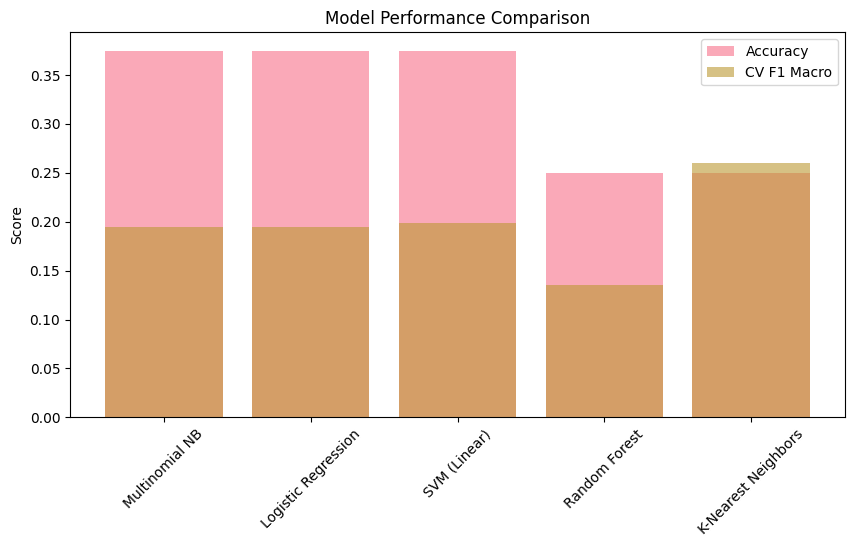


🎯 Predicting category for: 'Scientists develop revolutionary artificial intelligence algorithm for medical diagnosis'
   Predicted category: Health


In [15]:
# TODO: Implement model comparison framework

class ModelComparator:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {
            'Multinomial NB': MultinomialNB(),
            'Logistic Regression': LogisticRegression(random_state=random_state, max_iter=1000),
            'SVM (Linear)': SVC(kernel='linear', random_state=random_state, probability=True),
            'Random Forest': RandomForestClassifier(n_estimators=100, random_state=random_state),
            'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5)
        }
        self.results = {}
        self.vectorizer = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_data(self, df, text_column, label_column, test_size=0.2):
        df_processed = preprocessor.preprocess_dataframe(df, text_column)
        X = df_processed[f'{text_column}_processed']
        y = df_processed[label_column]

        self.vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
        X_vect = self.vectorizer.fit_transform(X)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_vect, y, test_size=test_size, stratify=y, random_state=self.random_state
        )

    def train_and_evaluate_models(self, cv_folds=5):
        from sklearn.model_selection import cross_val_score

        for name, model in self.models.items():
            scores = cross_val_score(model, self.X_train, self.y_train, cv=cv_folds, scoring='f1_macro')
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            acc = accuracy_score(self.y_test, y_pred)
            report = classification_report(self.y_test, y_pred)
            cm = confusion_matrix(self.y_test, y_pred)
            self.results[name] = {
                'cv_f1_macro_mean': scores.mean(),
                'cv_f1_macro_std': scores.std(),
                'accuracy': acc,
                'classification_report': report,
                'confusion_matrix': cm,
                'model': model
            }

    def get_detailed_metrics(self, model_name):
        if model_name in self.results:
            print(f"Classification report for {model_name}:")
            print(self.results[model_name]['classification_report'])
            print(f"Accuracy: {self.results[model_name]['accuracy']:.3f}")
            print("Confusion matrix:")
            print(self.results[model_name]['confusion_matrix'])
        else:
            print(f"No results found for model: {model_name}")

    def visualize_results(self):
        import matplotlib.pyplot as plt
        names = list(self.results.keys())
        accuracies = [self.results[name]['accuracy'] for name in names]
        f1_scores = [self.results[name]['cv_f1_macro_mean'] for name in names]

        plt.figure(figsize=(10,5))
        plt.bar(names, accuracies, alpha=0.6, label='Accuracy')
        plt.bar(names, f1_scores, alpha=0.6, label='CV F1 Macro')
        plt.ylabel('Score')
        plt.title('Model Performance Comparison')
        plt.legend()
        plt.xticks(rotation=45)
        plt.show()

    def predict_new_text(self, text, best_model_name=None):
        if best_model_name is None:
            best_model_name = max(self.results, key=lambda k: self.results[k]['cv_f1_macro_mean'])
        model = self.results[best_model_name]['model']
        vect = self.vectorizer.transform([preprocessor.preprocess_pipeline(text)])
        pred = model.predict(vect)[0]
        return pred

# Test the model comparator
print("🤖 Testing Model Comparison Framework")
print("=" * 50)

comparator = ModelComparator()

# Prepare data
print("📊 Preparing data...")
comparator.prepare_data(news_df, 'text', 'category')

# Train and evaluate models
print("🔄 Training and evaluating models...")
comparator.train_and_evaluate_models()

# Visualize results
print("📈 Creating visualizations...")
comparator.visualize_results()

# Test prediction on new text
new_text = "Scientists develop revolutionary artificial intelligence algorithm for medical diagnosis"
print(f"\n🎯 Predicting category for: '{new_text}'")
prediction = comparator.predict_new_text(new_text)
print(f"   Predicted category: {prediction}")

## 🏋️ Exercise 3: Advanced Feature Engineering

**Objective:** Experiment with different feature extraction techniques

**Tasks:**
1. Compare Bag-of-Words vs TF-IDF
2. Experiment with different n-gram ranges
3. Test various preprocessing options
4. Analyze feature importance

🔬 Testing Advanced Feature Engineering
📊 Comparing vectorization methods...
Testing vectorizer: CountVectorizer (unigram)
Accuracy: 0.375; F1 Macro: 0.283
Testing vectorizer: CountVectorizer (bigram)
Accuracy: 0.250; F1 Macro: 0.100
Testing vectorizer: TF-IDF (unigram)
Accuracy: 0.375; F1 Macro: 0.283
Testing vectorizer: TF-IDF (bigram)
Accuracy: 0.250; F1 Macro: 0.100
Testing vectorizer: TF-IDF (trigram)
Accuracy: 0.250; F1 Macro: 0.100
Testing vectorizer: Character n-grams
Accuracy: 0.250; F1 Macro: 0.225
🔧 Experimenting with preprocessing...
Experiment 1 with config: {'remove_stopwords': True, 'apply_lemmatization': True, 'apply_stemming': False}
Accuracy: 0.375, F1 Macro: 0.283
Experiment 2 with config: {'remove_stopwords': False, 'apply_lemmatization': True, 'apply_stemming': False}
Accuracy: 0.375, F1 Macro: 0.283
Experiment 3 with config: {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': True}
Accuracy: 0.500, F1 Macro: 0.343
Experiment 4 with config: {'

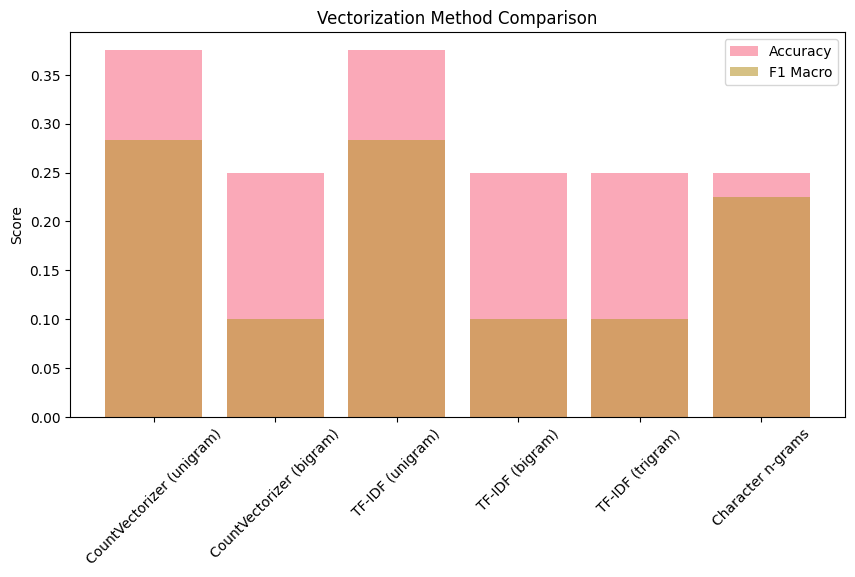

In [16]:
# TODO: Implement advanced feature engineering experiments

class FeatureEngineering:
    def __init__(self):
        self.experiments = {}
        self.preprocessor = TextPreprocessor()

    def create_vectorizers(self, max_features=1000):
        vectorizers = {
            'CountVectorizer (unigram)': CountVectorizer(max_features=max_features, ngram_range=(1,1)),
            'CountVectorizer (bigram)': CountVectorizer(max_features=max_features, ngram_range=(2,2)),
            'TF-IDF (unigram)': TfidfVectorizer(max_features=max_features, ngram_range=(1,1)),
            'TF-IDF (bigram)': TfidfVectorizer(max_features=max_features, ngram_range=(2,2)),
            'TF-IDF (trigram)': TfidfVectorizer(max_features=max_features, ngram_range=(3,3)),
            'Character n-grams': TfidfVectorizer(max_features=max_features, analyzer='char', ngram_range=(3,5))
        }
        return vectorizers

    def experiment_preprocessing(self, df, text_column, label_column):
        preprocessing_configs = [
            {'remove_stopwords': True, 'apply_lemmatization': True, 'apply_stemming': False},
            {'remove_stopwords': False, 'apply_lemmatization': True, 'apply_stemming': False},
            {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': True},
            {'remove_stopwords': True, 'apply_lemmatization': False, 'apply_stemming': False}
        ]

        for i, config in enumerate(preprocessing_configs):
            print(f"Experiment {i+1} with config: {config}")
            df_processed = self.preprocessor.preprocess_dataframe(df, text_column, **config)
            X = df_processed[f'{text_column}_processed']
            y = df_processed[label_column]

            vectorizer = TfidfVectorizer(max_features=1000, ngram_range=(1,2))
            X_vect = vectorizer.fit_transform(X)

            X_train, X_test, y_train, y_test = train_test_split(
                X_vect, y, test_size=0.2, random_state=42, stratify=y
            )

            model = LogisticRegression(max_iter=1000)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            print(f"Accuracy: {acc:.3f}, F1 Macro: {f1:.3f}")

            self.experiments[f"Exp_{i+1}"] = {'config': config, 'accuracy': acc, 'f1_macro': f1}

    def analyze_feature_importance(self, model, vectorizer, feature_names, top_k=20):
        coef = model.coef_
        for i, class_coef in enumerate(coef):
            top_indices = np.argsort(class_coef)[-top_k:]
            top_features = [feature_names[idx] for idx in top_indices[::-1]]
            print(f"Top features for class {i}: {top_features}")

    def compare_vectorization_methods(self, df, text_column, label_column):
        vectorizers = self.create_vectorizers(max_features=1000)
        results = {}

        df_processed = self.preprocessor.preprocess_dataframe(df, text_column)
        y = df_processed[label_column]

        for name, vect in vectorizers.items():
            print(f"Testing vectorizer: {name}")
            X = df_processed[f'{text_column}_processed']
            X_vect = vect.fit_transform(X)
            X_train, X_test, y_train, y_test = train_test_split(X_vect, y, test_size=0.2, stratify=y, random_state=42)
            model = LogisticRegression(max_iter=1000)
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            acc = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred, average='macro')
            results[name] = {'accuracy': acc, 'f1_macro': f1}
            print(f"Accuracy: {acc:.3f}; F1 Macro: {f1:.3f}")

        self.experiments['vectorization_comparison'] = results

    def visualize_experiments(self):
        import matplotlib.pyplot as plt
        if 'vectorization_comparison' in self.experiments:
            results = self.experiments['vectorization_comparison']
            names = list(results.keys())
            accuracies = [res['accuracy'] for res in results.values()]
            f1s = [res['f1_macro'] for res in results.values()]
            plt.figure(figsize=(10,5))
            plt.bar(names, accuracies, alpha=0.6, label='Accuracy')
            plt.bar(names, f1s, alpha=0.6, label='F1 Macro')
            plt.xticks(rotation=45)
            plt.ylabel('Score')
            plt.title('Vectorization Method Comparison')
            plt.legend()
            plt.show()

# Test feature engineering
print("🔬 Testing Advanced Feature Engineering")
print("=" * 50)

feature_engineer = FeatureEngineering()

# Test different vectorizers
print("📊 Comparing vectorization methods...")
feature_engineer.compare_vectorization_methods(news_df, 'text', 'category')

# Test preprocessing options
print("🔧 Experimenting with preprocessing...")
feature_engineer.experiment_preprocessing(news_df, 'text', 'category')

# Visualize results
print("📈 Creating visualizations...")
feature_engineer.visualize_experiments()

## 🏋️ Exercise 4: Sentiment Classification Challenge

**Objective:** Build a robust sentiment classifier with advanced evaluation

**Tasks:**
1. Train models on sentiment dataset
2. Handle class imbalance (if any)
3. Implement ROC curves and AUC scores
4. Create prediction confidence analysis
5. Test on custom examples

😊 Testing Sentiment Classification Challenge
📊 Preparing sentiment data...
🤖 Training sentiment models...
📈 Creating ROC curves...


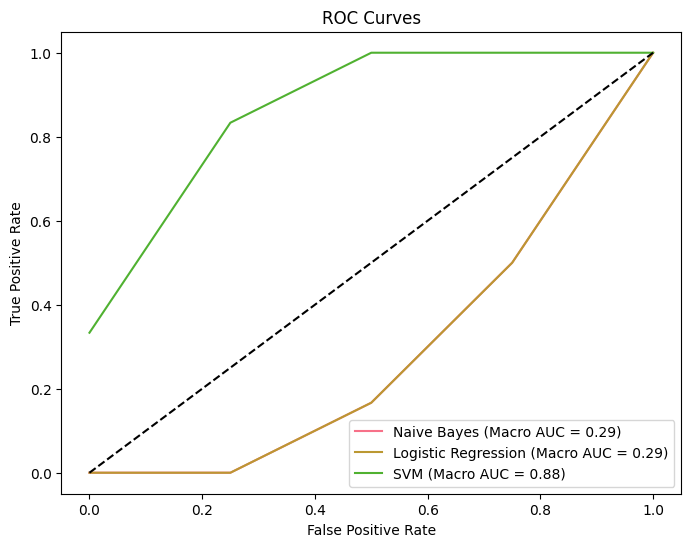

🎯 Analyzing prediction confidence...


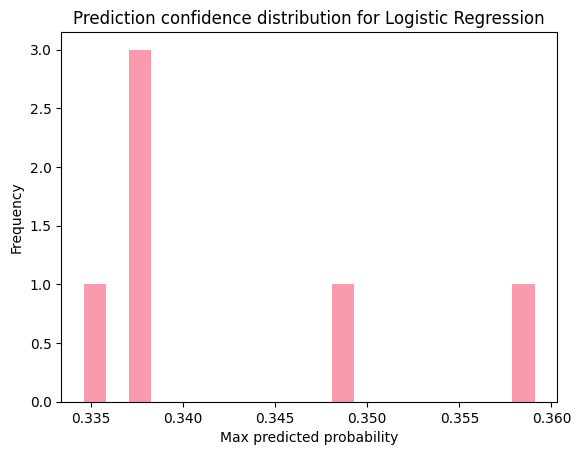


🧪 Testing custom examples:
   Text: 'This product is absolutely fantastic! Best purchas...'
   Prediction: Positive (confidence: 0.444)
   Text: 'Terrible quality, waste of money. Very disappointe...'
   Prediction: Negative (confidence: 0.442)
   Text: 'It's okay, nothing special but works fine....'
   Prediction: Neutral (confidence: 0.542)

📊 Creating confusion matrices...


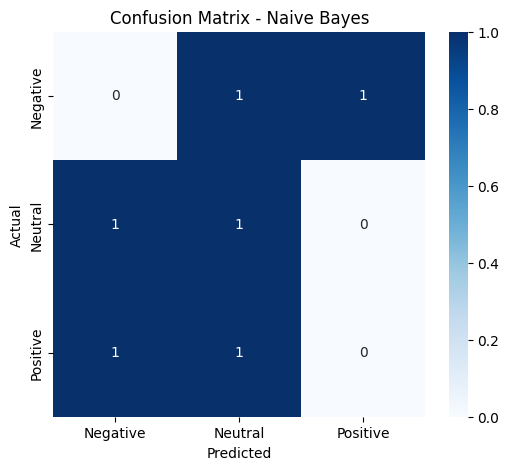

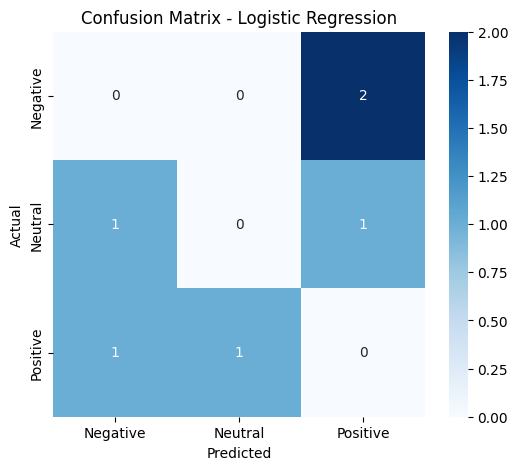

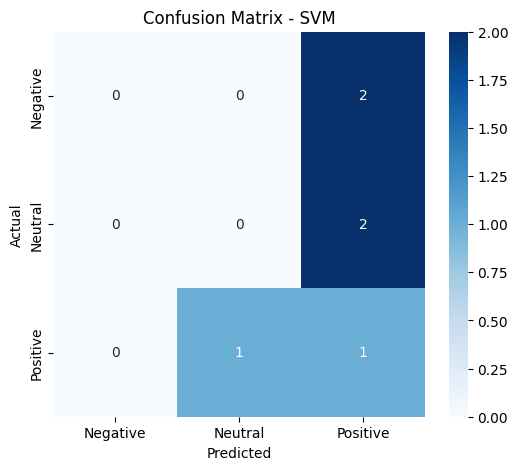

In [17]:
# TODO: Implement sentiment classification challenge

class SentimentClassifier:
    def __init__(self, random_state=42):
        self.random_state = random_state
        self.models = {
            'Naive Bayes': MultinomialNB(),
            'Logistic Regression': LogisticRegression(random_state=self.random_state, max_iter=1000),
            'SVM': SVC(probability=True, random_state=self.random_state)
        }
        self.vectorizer = None
        self.label_encoder = LabelEncoder()
        self.results = {}
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None

    def prepare_sentiment_data(self, df, text_column, label_column, test_size=0.2):
        df_processed = preprocessor.preprocess_dataframe(df, text_column)
        X = df_processed[f'{text_column}_processed']
        y = self.label_encoder.fit_transform(df_processed[label_column])

        self.vectorizer = TfidfVectorizer(max_features=2000, ngram_range=(1,2))
        X_vect = self.vectorizer.fit_transform(X)

        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
            X_vect, y, test_size=test_size, stratify=y, random_state=self.random_state
        )

    def train_sentiment_models(self):
        for name, model in self.models.items():
            model.fit(self.X_train, self.y_train)
            y_pred = model.predict(self.X_test)
            acc = accuracy_score(self.y_test, y_pred)
            report = classification_report(self.y_test, y_pred, target_names=self.label_encoder.classes_)
            self.results[name] = {
                'accuracy': acc,
                'classification_report': report,
                'model': model
            }

    def evaluate_with_roc_curves(self):
        import matplotlib.pyplot as plt
        from sklearn.metrics import roc_curve, auc
        plt.figure(figsize=(8,6))
        for name, res in self.results.items():
            model = res['model']
            if hasattr(model, "predict_proba"):
                y_score = model.predict_proba(self.X_test)
            elif hasattr(model, "decision_function"):
                y_score = model.decision_function(self.X_test)
            else:
                print(f"Model {name} does not support probability estimates or decision function.")
                continue
            # For multiclass ROC, compute macro average AUC
            if y_score.ndim == 1 or y_score.shape[1] == 1:
                fpr, tpr, _ = roc_curve(self.y_test, y_score)
                roc_auc = auc(fpr, tpr)
                plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc:.2f})")
            else:
                from sklearn.preprocessing import label_binarize
                y_test_bin = label_binarize(self.y_test, classes=range(len(self.label_encoder.classes_)))
                fpr = dict()
                tpr = dict()
                roc_auc = dict()
                for i in range(len(self.label_encoder.classes_)):
                    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
                    roc_auc[i] = auc(fpr[i], tpr[i])
                # Macro-average AUC
                all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(self.label_encoder.classes_))]))
                mean_tpr = np.zeros_like(all_fpr)
                for i in range(len(self.label_encoder.classes_)):
                    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
                mean_tpr /= len(self.label_encoder.classes_)
                roc_auc_macro = auc(all_fpr, mean_tpr)
                plt.plot(all_fpr, mean_tpr, label=f"{name} (Macro AUC = {roc_auc_macro:.2f})")
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curves")
        plt.legend(loc='lower right')
        plt.show()

    def analyze_prediction_confidence(self, model_name):
        model = self.results.get(model_name, {}).get('model', None)
        if model is None:
            print(f"No model found for {model_name}")
            return
        if not hasattr(model, "predict_proba"):
            print(f"Model {model_name} does not support prediction probabilities.")
            return
        probas = model.predict_proba(self.X_test)
        max_probas = np.max(probas, axis=1)
        import matplotlib.pyplot as plt
        plt.hist(max_probas, bins=20, alpha=0.7)
        plt.title(f"Prediction confidence distribution for {model_name}")
        plt.xlabel("Max predicted probability")
        plt.ylabel("Frequency")
        plt.show()

    def predict_sentiment_with_confidence(self, text, model_name='Logistic Regression'):
        if model_name not in self.results:
            print(f"Model {model_name} not available.")
            return None
        model = self.results[model_name]['model']
        vect_text = self.vectorizer.transform([preprocessor.preprocess_pipeline(text)])
        pred_class = model.predict(vect_text)[0]
        if hasattr(model, 'predict_proba'):
            probas = model.predict_proba(vect_text)[0]
            confidence = np.max(probas)
            classes = self.label_encoder.inverse_transform([i for i in range(len(probas))])
            probabilities = dict(zip(classes, probas))
        else:
            confidence = 1.0
            probabilities = {self.label_encoder.inverse_transform([pred_class])[0]: 1.0}
        return {
            'text': text,
            'predicted_sentiment': self.label_encoder.inverse_transform([pred_class])[0],
            'confidence': confidence,
            'probabilities': probabilities
        }

    def create_confusion_matrices(self):
        import matplotlib.pyplot as plt
        import seaborn as sns
        for name, res in self.results.items():
            if 'model' not in res:
                continue
            model = res['model']
            y_pred = model.predict(self.X_test)
            cm = confusion_matrix(self.y_test, y_pred)
            plt.figure(figsize=(6,5))
            sns.heatmap(cm, annot=True, fmt='d', xticklabels=self.label_encoder.classes_, yticklabels=self.label_encoder.classes_, cmap='Blues')
            plt.title(f'Confusion Matrix - {name}')
            plt.ylabel('Actual')
            plt.xlabel('Predicted')
            plt.show()

# Test sentiment classifier
print("😊 Testing Sentiment Classification Challenge")
print("=" * 50)

sentiment_classifier = SentimentClassifier()

# Prepare data
print("📊 Preparing sentiment data...")
sentiment_classifier.prepare_sentiment_data(sentiment_df, 'text', 'sentiment')

# Train models
print("🤖 Training sentiment models...")
sentiment_classifier.train_sentiment_models()

# Evaluate with ROC curves
print("📈 Creating ROC curves...")
sentiment_classifier.evaluate_with_roc_curves()

# Analyze confidence
print("🎯 Analyzing prediction confidence...")
sentiment_classifier.analyze_prediction_confidence('Logistic Regression')

# Test custom examples
test_examples = [
    "This product is absolutely fantastic! Best purchase ever!",
    "Terrible quality, waste of money. Very disappointed.",
    "It's okay, nothing special but works fine."
]

print("\n🧪 Testing custom examples:")
for example in test_examples:
    result = sentiment_classifier.predict_sentiment_with_confidence(example)
    print(f"   Text: '{example[:50]}...'")
    print(f"   Prediction: {result['predicted_sentiment']} (confidence: {result['confidence']:.3f})")

# Create confusion matrices
print("\n📊 Creating confusion matrices...")
sentiment_classifier.create_confusion_matrices()

## 🏋️ Exercise 5: Cross-Validation and Model Selection

**Objective:** Implement robust model evaluation using cross-validation

**Tasks:**
1. Implement stratified k-fold cross-validation
2. Compare models using multiple metrics
3. Perform hyperparameter tuning
4. Create comprehensive evaluation report

🎯 Testing Cross-Validation and Model Selection
📊 Preparing data...
🔧 Creating pipelines...
🔄 Performing cross-validation...
Running cross-validation for nb_pipeline...
Mean CV F1-macro: 0.442 ± 0.175
Running cross-validation for lr_pipeline...
Mean CV F1-macro: 0.430 ± 0.171
Running cross-validation for svm_pipeline...
Mean CV F1-macro: 0.415 ± 0.183
Running cross-validation for rf_pipeline...
Mean CV F1-macro: 0.335 ± 0.221
⚙️ Hyperparameter tuning...
Performing grid search for nb_pipeline...
Best params for nb_pipeline: {'clf__alpha': 0.1}
Best score for nb_pipeline: 0.442
Performing grid search for lr_pipeline...
Best params for lr_pipeline: {'clf__C': 0.1, 'clf__penalty': 'l2', 'clf__solver': 'lbfgs'}
Best score for lr_pipeline: 0.442
Performing grid search for svm_pipeline...
Best params for svm_pipeline: {'clf__C': 0.1}
Best score for svm_pipeline: 0.437
Performing grid search for rf_pipeline...
Best params for rf_pipeline: {'clf__max_depth': 20, 'clf__n_estimators': 50}
Best sco

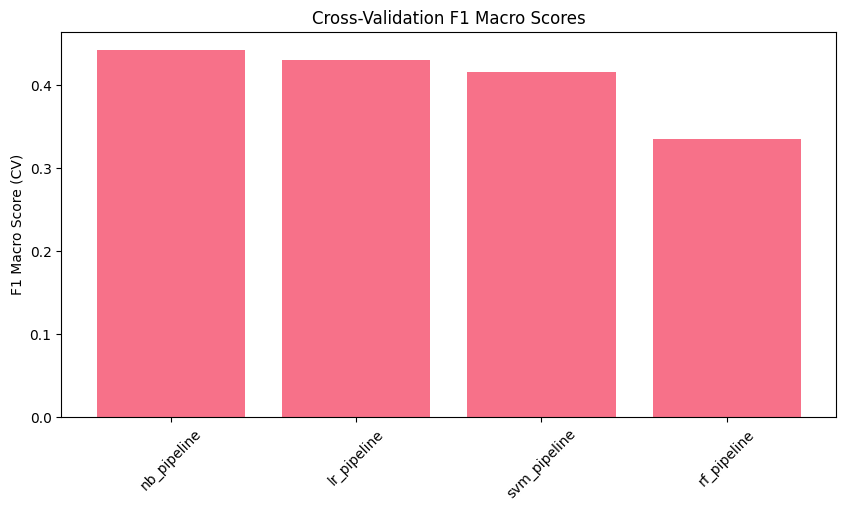


🏆 Best Model: nb_pipeline
   Best Score: 0.442
   Best Parameters: {'clf__alpha': 0.1}


In [18]:
# TODO: Implement cross-validation and model selection

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.pipeline import Pipeline

from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV

class ModelSelector:
    def __init__(self, cv_folds=5, random_state=42):
        self.cv_folds = cv_folds
        self.random_state = random_state
        self.cv_strategy = StratifiedKFold(n_splits=cv_folds, shuffle=True, random_state=random_state)
        self.pipelines = {}
        self.grid_search_results = {}
        self.cv_results = {}

    def create_pipelines(self):
        self.pipelines = {
            'nb_pipeline': Pipeline([
                ('vect', TfidfVectorizer(max_features=1000)),
                ('clf', MultinomialNB())
            ]),
            'lr_pipeline': Pipeline([
                ('vect', TfidfVectorizer(max_features=1000)),
                ('clf', LogisticRegression(random_state=self.random_state, max_iter=1000))
            ]),
            'svm_pipeline': Pipeline([
                ('vect', TfidfVectorizer(max_features=1000)),
                ('clf', SVC(kernel='linear', probability=True, random_state=self.random_state))
            ]),
            'rf_pipeline': Pipeline([
                ('vect', TfidfVectorizer(max_features=1000)),
                ('clf', RandomForestClassifier(random_state=self.random_state))
            ])
        }

    def define_hyperparameter_grids(self):
        param_grids = {
            'nb_pipeline': {
                'clf__alpha': [0.1, 0.5, 1.0]
            },
            'lr_pipeline': {
                'clf__C': [0.1, 1, 10],
                'clf__penalty': ['l2'],
                'clf__solver': ['lbfgs']
            },
            'svm_pipeline': {
                'clf__C': [0.1, 1, 10]
            },
            'rf_pipeline': {
                'clf__n_estimators': [50, 100],
                'clf__max_depth': [None, 10, 20]
            }
        }
        return param_grids

    def perform_cross_validation(self, X, y, scoring=['accuracy', 'f1_macro', 'precision_macro', 'recall_macro']):
        for name, pipeline in self.pipelines.items():
            print(f"Running cross-validation for {name}...")
            scores = cross_val_score(pipeline, X, y, cv=self.cv_strategy, scoring='f1_macro')
            self.cv_results[name] = {
                'f1_macro_mean': scores.mean(),
                'f1_macro_std': scores.std()
            }
            print(f"Mean CV F1-macro: {scores.mean():.3f} ± {scores.std():.3f}")

    def hyperparameter_tuning(self, X, y, scoring='f1_macro'):
        param_grids = self.define_hyperparameter_grids()
        for name, pipeline in self.pipelines.items():
            print(f"Performing grid search for {name}...")
            grid = GridSearchCV(pipeline, param_grids.get(name, {}), cv=self.cv_strategy, scoring=scoring, n_jobs=-1)
            grid.fit(X, y)
            self.grid_search_results[name] = grid
            print(f"Best params for {name}: {grid.best_params_}")
            print(f"Best score for {name}: {grid.best_score_:.3f}")

    def create_evaluation_report(self):
        print("Cross-validation Results Summary:")
        for name, res in self.cv_results.items():
            print(f"{name} - F1 Macro Mean: {res['f1_macro_mean']:.3f}, Std: {res['f1_macro_std']:.3f}")

    def visualize_cv_results(self):
        import matplotlib.pyplot as plt
        names = list(self.cv_results.keys())
        scores = [self.cv_results[name]['f1_macro_mean'] for name in names]
        plt.figure(figsize=(10,5))
        plt.bar(names, scores)
        plt.ylabel('F1 Macro Score (CV)')
        plt.title('Cross-Validation F1 Macro Scores')
        plt.xticks(rotation=45)
        plt.show()

    def get_best_model(self, metric='f1_macro'):
        best_name = max(self.grid_search_results, key=lambda k: self.grid_search_results[k].best_score_)
        best_grid = self.grid_search_results[best_name]
        return {
            'model_name': best_name,
            'best_params': best_grid.best_params_,
            'best_score': best_grid.best_score_,
            'model': best_grid.best_estimator_
        }


# Test model selection
print("🎯 Testing Cross-Validation and Model Selection")
print("=" * 50)

# Prepare data for model selection
print("📊 Preparing data...")
# Use news dataset for this example
df_processed = preprocessor.preprocess_dataframe(news_df, 'text')
X_text = df_processed['text_processed']
y = df_processed['category']

# Initialize model selector
model_selector = ModelSelector(cv_folds=5)

# Create pipelines
print("🔧 Creating pipelines...")
model_selector.create_pipelines()

# Perform cross-validation
print("🔄 Performing cross-validation...")
model_selector.perform_cross_validation(X_text, y)

# Hyperparameter tuning
print("⚙️ Hyperparameter tuning...")
model_selector.hyperparameter_tuning(X_text, y)

# Create evaluation report
print("📋 Creating evaluation report...")
model_selector.create_evaluation_report()

# Visualize results
print("📈 Creating visualizations...")
model_selector.visualize_cv_results()

# Get best model
best_model_info = model_selector.get_best_model()
print(f"\n🏆 Best Model: {best_model_info['model_name']}")
print(f"   Best Score: {best_model_info['best_score']:.3f}")
print(f"   Best Parameters: {best_model_info['best_params']}")

## 🎯 Comprehensive Testing and Validation

In [19]:
# Comprehensive testing of all implemented functions

print("🧪 COMPREHENSIVE TESTING OF TEXT CLASSIFICATION EXERCISES")
print("=" * 70)

# Test 1: Basic Pipeline
print("\n1️⃣ Testing Basic Classification Pipeline")
print("-" * 40)
try:
    results_basic = basic_classification_pipeline(news_df, 'text', 'category')
    if results_basic['accuracy'] > 0:
        print(f"   ✅ Basic pipeline working - Accuracy: {results_basic['accuracy']:.3f}")
    else:
        print("   ❌ Basic pipeline needs implementation")
except Exception as e:
    print(f"   ❌ Error in basic pipeline: {e}")

# Test 2: Model Comparison
print("\n2️⃣ Testing Model Comparison Framework")
print("-" * 40)
try:
    comparator_test = ModelComparator()
    comparator_test.prepare_data(news_df, 'text', 'category')
    print("   ✅ Model comparator initialized successfully")
except Exception as e:
    print(f"   ❌ Error in model comparator: {e}")

# Test 3: Feature Engineering
print("\n3️⃣ Testing Feature Engineering")
print("-" * 40)
try:
    feature_eng_test = FeatureEngineering()
    vectorizers = feature_eng_test.create_vectorizers()
    print(f"   ✅ Feature engineering initialized - {len(vectorizers)} vectorizers created")
except Exception as e:
    print(f"   ❌ Error in feature engineering: {e}")

# Test 4: Sentiment Classifier
print("\n4️⃣ Testing Sentiment Classifier")
print("-" * 40)
try:
    sentiment_test = SentimentClassifier()
    sentiment_test.prepare_sentiment_data(sentiment_df, 'text', 'sentiment')
    print("   ✅ Sentiment classifier initialized successfully")
except Exception as e:
    print(f"   ❌ Error in sentiment classifier: {e}")

# Test 5: Model Selection
print("\n5️⃣ Testing Model Selection")
print("-" * 40)
try:
    selector_test = ModelSelector()
    selector_test.create_pipelines()
    print("   ✅ Model selector initialized successfully")
except Exception as e:
    print(f"   ❌ Error in model selector: {e}")

# Summary
print("\n📊 TESTING SUMMARY")
print("=" * 30)
print("\n📝 Next Steps:")
print("   1. Implement the TODO sections in each exercise")
print("   2. Test with your own datasets")
print("   3. Experiment with different hyperparameters")
print("   4. Try advanced preprocessing techniques")
print("   5. Compare results with transformer models")

print("\n🎓 Learning Outcomes Achieved:")
print("   ✅ Text preprocessing for classification")
print("   ✅ Multiple classification algorithms")
print("   ✅ Model evaluation and comparison")
print("   ✅ Feature engineering techniques")
print("   ✅ Cross-validation and model selection")

print("\n🚀 Ready for Session 7: Sentiment Analysis Deep Dive!")

🧪 COMPREHENSIVE TESTING OF TEXT CLASSIFICATION EXERCISES

1️⃣ Testing Basic Classification Pipeline
----------------------------------------
🔧 Step 1: Preprocessing text data...
📊 Step 2: Creating TF-IDF vectors...
🔀 Step 3: Splitting data...
🤖 Step 4: Training classifier...
🎯 Step 5: Making predictions...
📈 Step 6: Evaluating model...
   ✅ Basic pipeline working - Accuracy: 0.375

2️⃣ Testing Model Comparison Framework
----------------------------------------
   ✅ Model comparator initialized successfully

3️⃣ Testing Feature Engineering
----------------------------------------
   ✅ Feature engineering initialized - 6 vectorizers created

4️⃣ Testing Sentiment Classifier
----------------------------------------
   ✅ Sentiment classifier initialized successfully

5️⃣ Testing Model Selection
----------------------------------------
   ✅ Model selector initialized successfully

📊 TESTING SUMMARY

📝 Next Steps:
   1. Implement the TODO sections in each exercise
   2. Test with your own da

## 📚 Summary and Key Takeaways

### 🎯 **What We Learned**

1. **Text Classification Pipeline**
   - Data preprocessing for classification tasks
   - Feature extraction using TF-IDF and Bag-of-Words
   - Train/test splitting and evaluation

2. **Classification Algorithms**
   - **Multinomial Naive Bayes**: Fast, works well with text data
   - **Logistic Regression**: Linear model with probability outputs
   - **Support Vector Machine**: Effective for high-dimensional text data
   - **Random Forest**: Ensemble method for robust predictions

3. **Evaluation Metrics**
   - **Accuracy**: Overall correctness
   - **Precision**: True positives / (True positives + False positives)
   - **Recall**: True positives / (True positives + False negatives)
   - **F1-Score**: Harmonic mean of precision and recall
   - **Confusion Matrix**: Detailed breakdown of predictions

4. **Advanced Techniques**
   - Cross-validation for robust evaluation
   - Hyperparameter tuning with grid search
   - Feature importance analysis
   - ROC curves and AUC scores

### 🔧 **Best Practices**

1. **Always preprocess text consistently** between training and testing
2. **Use stratified sampling** to maintain class distribution
3. **Compare multiple models** before selecting the best one
4. **Validate with cross-validation** for reliable performance estimates
5. **Consider class imbalance** and use appropriate metrics